## Personal Key Indicators of Heart Disease, an analysis

Heart disease is a leading cause of death in countries around the world. 

Research shows a number of comorbidities contribute to the risk of developing disease at all ages. 

Being able to predict the prevalence of heart disease will allow us to identify patients sooner and continue evolving from reactive medicine towards proactive intervention.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import os

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from dython.nominal import associations, numerical_encoding, cluster_correlations
from dython.data_utils import split_hist

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
sns.set_theme(style='whitegrid', palette='pastel')

In [3]:
data = pd.read_csv('../Capstone-Two/heartPHI2020.csv')
df = data.copy()

In [4]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Dataset and column descriptions:

Kaggle Dataset at https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Adapted by the creator from the 2020 annual CDC BRFSS survey data of 400k adults related to their health status to include heart disease indicators. 

**Column Details:**

*HeartDisease:* Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI). *(Yes / No)*

*BMI:* Body Mass Index (BMI) *(BMI=kg/(m^2))*

*Smoking:* Have you smoked at least 100 ciagrettes in your entire life? [Note: 1 pack = ~25 cigarettes] *(Yes / No)*

*AlcoholDrinking:* Heavy drinker? (Adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) *(Yes / No)*

*Stroke:* Have you ever been told you had a stroke? *(Yes / No)*

*PhysicalHealth:* How many days during the past 30 days was your physical health not good? (Including physical illness or injury.) *(0-30 days)*

*MentalHealth:* How many days during the past 30 days was your mental health not good? (Includes stress, depression, and problems with emotions.) *(0-30 days)*

*DiffWalking:* Do you have serious difficulty walking or climbing stairs? *(Yes / No)*

*Sex:* Are you Female or Male? *('Male', 'Female')*

*AgeCategory:* thirteen age categories. *('18-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older')*

*Race:* Which one of these groups best represents your race? *('White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Hispanic', 'Other')*

*Diabetic:* Have you ever been told you have diabetes? *('Yes','No'','No, borderline diabetes', 'Yes (during pregnancy)')*

*PhysicalActivity:* Respondents who reported doing physical activity or exercise during the past 30 days other than their regular job. *(Yes / No)*

*GenHealth:* Would you say that your general health is- *('Poor','Fair','Good','Very good','Excellent')*

*SleepTime:* On average, how many hours of sleep do you get in a 24-hour period? *(0-24)*

*Asthma:* Have you ever been told you had asthma? *(Yes / No)*

*KidneyDisease:* Were you ever told you have kidney disease (Not including kidney stones, bladder infection or incontinence.) *(Yes / No)*

*SkinCancer:* Were you ever told you had skin cancer? *(Yes / No)*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [7]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## EDA and Data Wrangling

In [8]:
# nunique values in column
columns = df.columns
for col in columns:
    print('Nunique in ' + col + ': ' +  str(df[col].nunique()) + '\n')

Nunique in HeartDisease: 2

Nunique in BMI: 3604

Nunique in Smoking: 2

Nunique in AlcoholDrinking: 2

Nunique in Stroke: 2

Nunique in PhysicalHealth: 31

Nunique in MentalHealth: 31

Nunique in DiffWalking: 2

Nunique in Sex: 2

Nunique in AgeCategory: 13

Nunique in Race: 6

Nunique in Diabetic: 4

Nunique in PhysicalActivity: 2

Nunique in GenHealth: 5

Nunique in SleepTime: 24

Nunique in Asthma: 2

Nunique in KidneyDisease: 2

Nunique in SkinCancer: 2



In [9]:
# unique values in column
for col in columns:
    print('Unique values in ' + col + ': ' +  str(df[col].unique()) + '\n')

Unique values in HeartDisease: ['No' 'Yes']

Unique values in BMI: [16.6  20.34 26.58 ... 62.42 51.46 46.56]

Unique values in Smoking: ['Yes' 'No']

Unique values in AlcoholDrinking: ['No' 'Yes']

Unique values in Stroke: ['No' 'Yes']

Unique values in PhysicalHealth: [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]

Unique values in MentalHealth: [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]

Unique values in DiffWalking: ['No' 'Yes']

Unique values in Sex: ['Female' 'Male']

Unique values in AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

Unique values in Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

Unique values in Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

Unique values in Ph

In [10]:
# people with MentalHealth or PhysicalHealth response of 0, 
# responded that they had mental and physical problems 0 out of the last 30 days
df[['SleepTime', 'PhysicalHealth', 'MentalHealth']] = df[['SleepTime', 'PhysicalHealth', 'MentalHealth']].astype(int)

In [11]:
# similar to this study - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4877313/
# will evaluate, BMI PhysicalHealth, MentalHealth, and SleepTime as both continuous and categorical variables
# they used these bins for SleepTime of ≤ 6 h, > 6 to < 9 h, ≥ 9 h
# MentalHealth and PhysicalHealth variables are responses to how many days in last 30-31 were bad for health
# binning them by week
# Underweight: Less than 18.5, Healthy: 18.5 to 24.9, Overweight: 25 to 29.9, Class I obesity: 30 to 34.9, Class II obesity: 35 to 39.9, Class III obesity: More than 40.

sleep_bins = [-np.inf, 5, 7, 9, np.inf]
sleep_labels = ['≤ 5', '> 5 to ≤ 7 h', '> 7 to ≤ 9 h', '> 9 h']
df['SleepTime_binned'] = pd.cut(df['SleepTime'], bins=sleep_bins, labels=sleep_labels)

bmi_bins = [-np.inf, 18.49, 24.9, 29.9, 34.9, 39.9, np.inf]
bmi_labels = ['Underweight','Healthy','Overweight', 'Class I Obesity', 'Class II Obesity', 'Class III Obesity']
df['BMI_binned'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

mental_bins = [-np.inf, 7, 14, 21, np.inf]
mental_labels = ['≤ 7 days','8-14 days','15-21 days', '> 21 days']
df['MentalHealth_binned'] = pd.cut(df['MentalHealth'], bins=mental_bins, labels=mental_labels)

physical_bins = [-np.inf, 7, 14, 21, np.inf]
physical_labels = ['≤ 7 days','8-14 days','15-21 days', '> 21 days']
df['PhysicalHealth_binned'] = pd.cut(df['PhysicalHealth'], bins=physical_bins, labels=physical_labels)

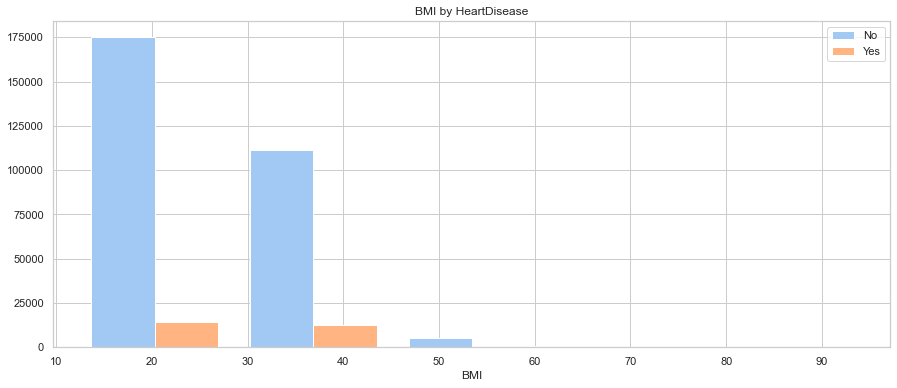

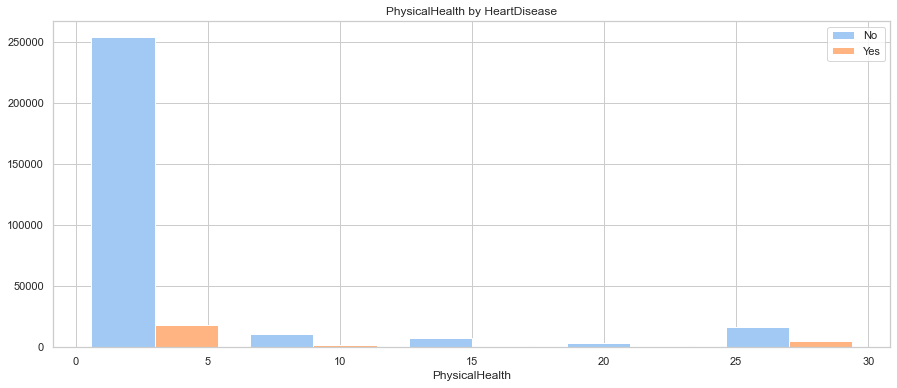

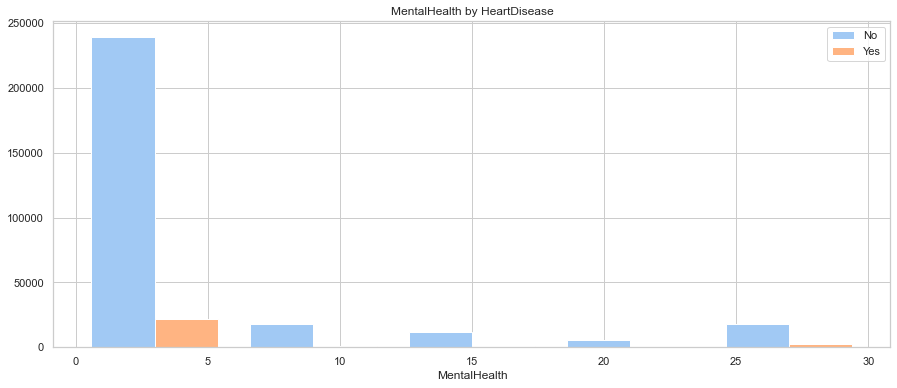

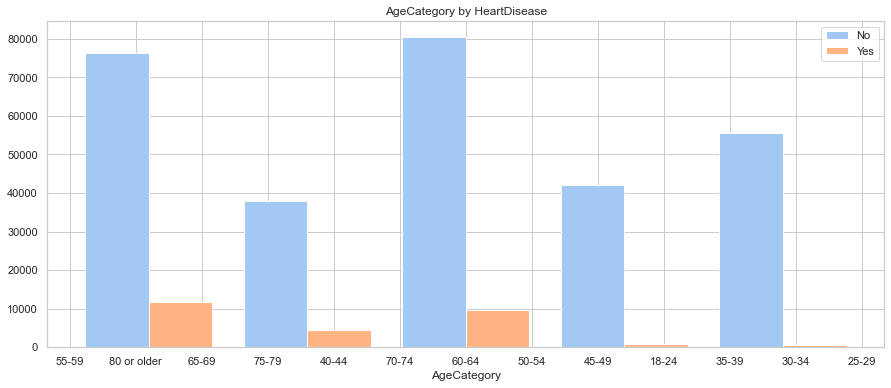

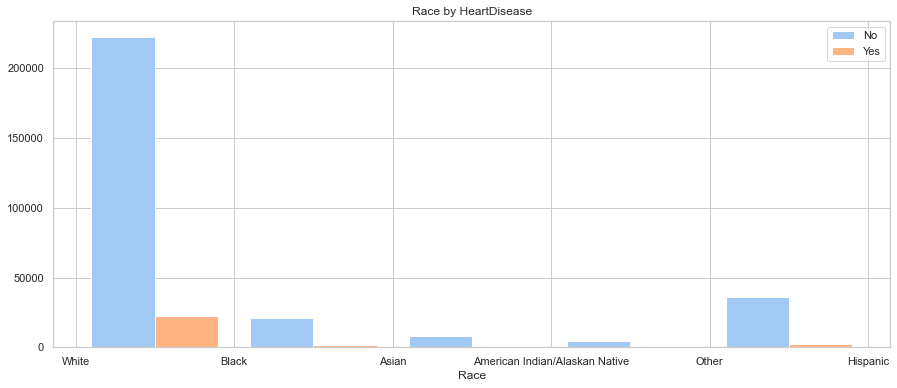

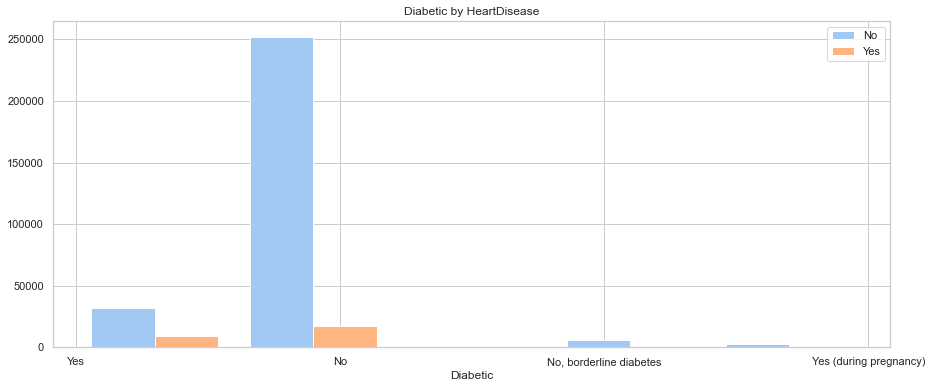

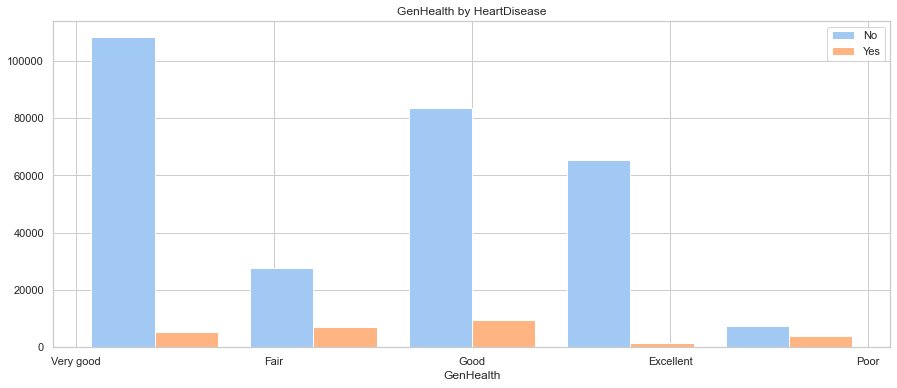

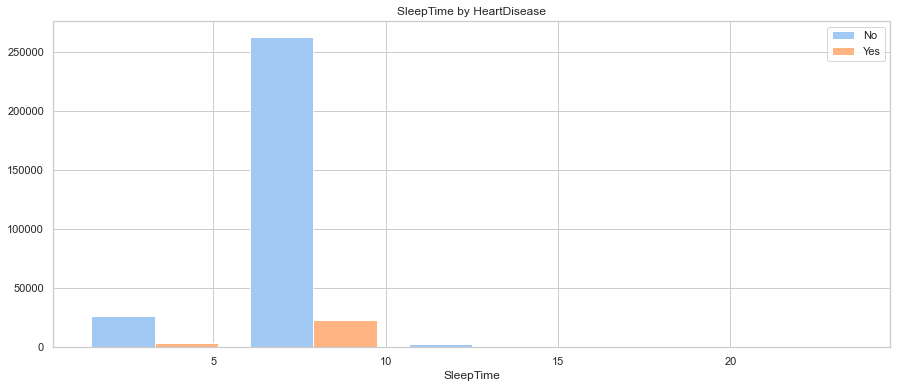

In [12]:
# distribution of features by HeartDisease
for col in columns:
    if df[col].nunique() > 2:
        split_hist(df, col, split_by='HeartDisease', bins=5, figsize=(15,6))

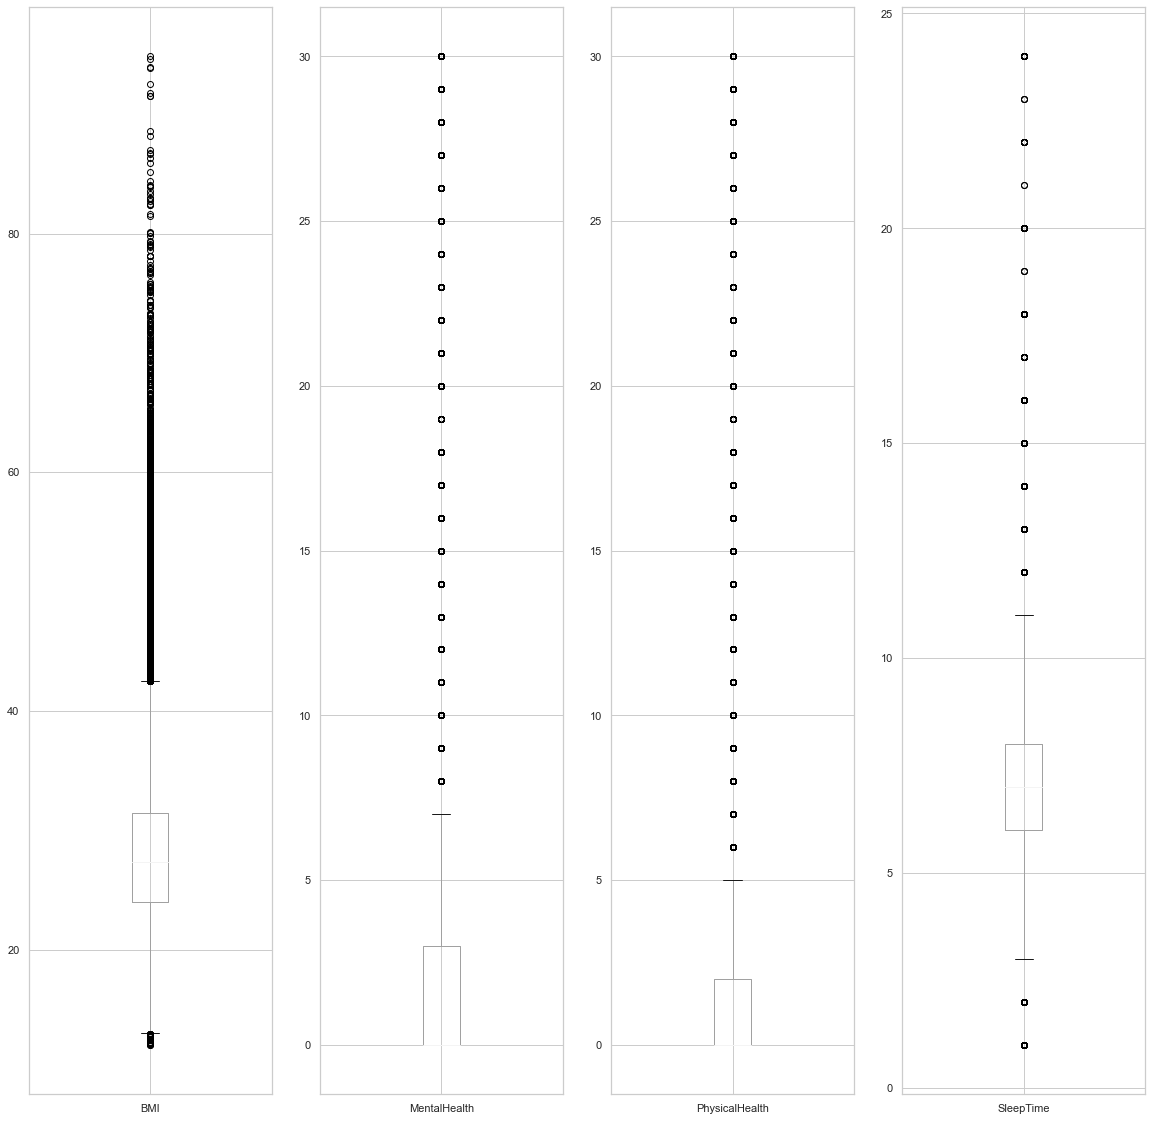

In [13]:
fig, ax = plt.subplots(1,4, figsize=(20,20))
df[['BMI']].boxplot(ax=ax[0])
df[['MentalHealth']].boxplot(ax=ax[1])
df[['PhysicalHealth']].boxplot(ax=ax[2])
df[['SleepTime']].boxplot(ax=ax[3])
plt.show()

 400 lbs at 4 foot 8, 657 at 6 feet tall, BMI of 90 is plausible
 BMI = kg/(m^2)

## Handling imbalanced data

After undersampling: Counter({'No': 27373, 'Yes': 27373})


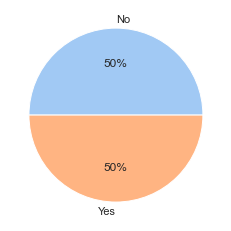

In [14]:
# Oversample and undersample and look at distributions.
# Undersample removes samples randomly from the majority class to make the distribution more equal
# As usual, X is all minus target variable
under_sampler = RandomUnderSampler(sampling_strategy=1, random_state=123)
X = df.iloc[:, 1:]
y = df['HeartDisease']
X_under, y_under = under_sampler.fit_resample(X, y)

# Count classes and create pie chart
print(f'After undersampling: {Counter(y_under)}')
plt.pie(y_under.value_counts(), labels = ['No', 'Yes'], autopct='%.0f%%');

In [15]:
X_under.describe(include='all')

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,SleepTime_binned,BMI_binned,MentalHealth_binned,PhysicalHealth_binned
count,54746.000000,54746,54746,54746,54746.000000,54746.000000,54746,54746,54746,54746,...,54746,54746,54746.000000,54746,54746,54746,54746,54746,54746,54746
unique,NaN,2,2,2,NaN,NaN,2,2,13,6,...,2,5,NaN,2,2,2,4,6,4,4
top,NaN,No,No,No,NaN,NaN,No,Male,70-74,White,...,Yes,Good,NaN,No,No,No,> 5 to ≤ 7 h,Overweight,≤ 7 days,≤ 7 days
freq,NaN,27923,51653,49659,NaN,NaN,41548,28918,7224,43328,...,38974,17413,NaN,46308,50533,47412,26011,19915,45193,43386
mean,28.792460,NaN,NaN,NaN,5.371223,4.241771,NaN,NaN,NaN,NaN,...,NaN,NaN,7.118164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.470628,NaN,NaN,NaN,9.954864,8.553142,NaN,NaN,NaN,NaN,...,NaN,NaN,1.597540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,12.210000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24.390000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,27.710000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,32.010000,NaN,NaN,NaN,5.000000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After oversampling: Counter({'No': 292422, 'Yes': 292422})


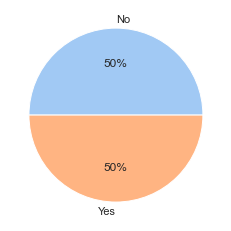

In [16]:
# oversampling randomly chooses and adds in samples from minority class to make distribution more equal
over_sampler = RandomOverSampler(sampling_strategy='minority', random_state=123)
X = df.iloc[:, 1:]
y = df['HeartDisease']
X_over, y_over = over_sampler.fit_resample(X, y)

print(f'After oversampling: {Counter(y_over)}')
plt.pie(y_over.value_counts(), labels = ['No', 'Yes'], autopct='%.0f%%');

In [17]:
X_over.describe(include='all')

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,SleepTime_binned,BMI_binned,MentalHealth_binned,PhysicalHealth_binned
count,584844.000000,584844,584844,584844,584844.000000,584844.000000,584844,584844,584844,584844,...,584844,584844,584844.000000,584844,584844,584844,584844,584844,584844,584844
unique,NaN,2,2,2,NaN,NaN,2,2,13,6,...,2,5,NaN,2,2,2,4,6,4,4
top,NaN,No,No,No,NaN,NaN,No,Male,70-74,White,...,Yes,Good,NaN,No,No,No,> 5 to ≤ 7 h,Overweight,≤ 7 days,≤ 7 days
freq,NaN,297855,552085,530072,NaN,NaN,443255,308059,77870,463404,...,417394,185962,NaN,494002,539414,506541,277994,211296,482621,462973
mean,28.808107,NaN,NaN,NaN,5.390971,4.240462,NaN,NaN,NaN,NaN,...,NaN,NaN,7.115034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.475100,NaN,NaN,NaN,9.969421,8.535121,NaN,NaN,NaN,NaN,...,NaN,NaN,1.603945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,12.020000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24.390000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,27.750000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,32.080000,NaN,NaN,NaN,5.000000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
y_under = pd.DataFrame(y_under)
undersampled_df = y_under.merge(X_under, left_index=True, right_index=True)
df = undersampled_df

## Exploring resampled data

In [19]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.121185,0.069538,-0.040848
PhysicalHealth,0.121185,1.000000,0.323493,-0.068301
MentalHealth,0.069538,0.323493,1.000000,-0.119339
SleepTime,-0.040848,-0.068301,-0.119339,1.000000


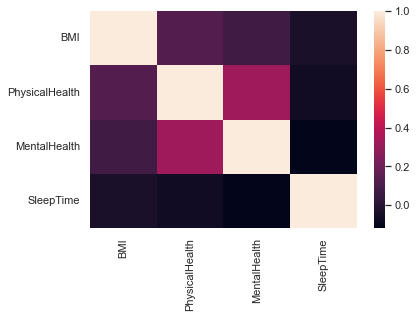

In [20]:
fig, ax = plt.subplots()
ax = sns.heatmap(df.corr())

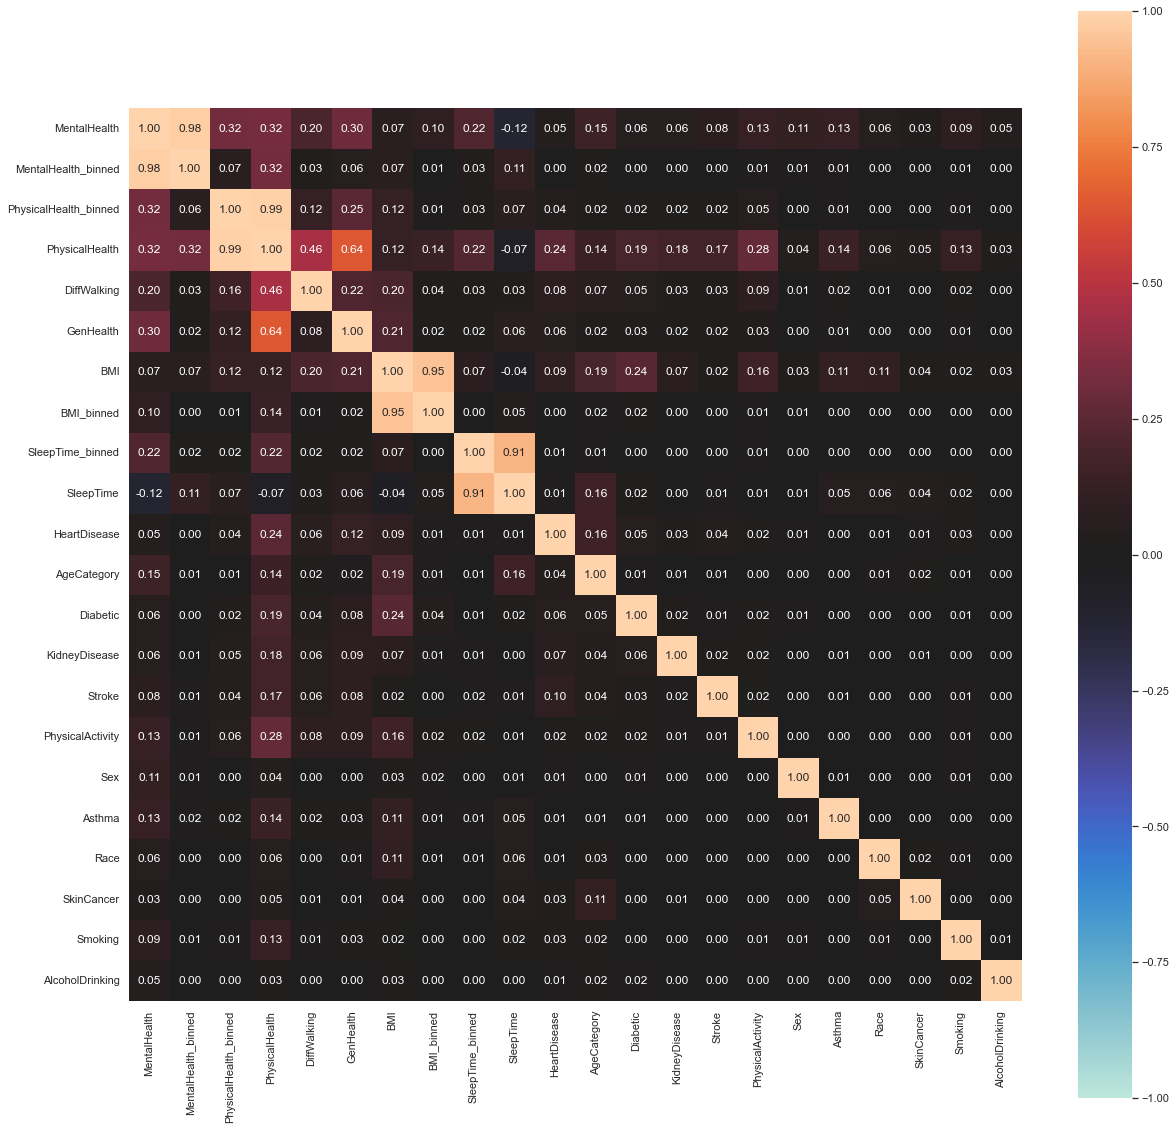

{'corr':                        MentalHealth  MentalHealth_binned  \
 MentalHealth               1.000000             0.981155   
 MentalHealth_binned        0.981155             1.000000   
 PhysicalHealth_binned      0.318944             0.062714   
 PhysicalHealth             0.323493             0.320235   
 DiffWalking                0.196699             0.031043   
 GenHealth                  0.297367             0.024597   
 BMI                        0.069538             0.069094   
 BMI_binned                 0.097781             0.002742   
 SleepTime_binned           0.216154             0.016930   
 SleepTime                 -0.119339             0.113252   
 HeartDisease               0.046766             0.002927   
 AgeCategory                0.154881             0.005307   
 Diabetic                   0.060234             0.002914   
 KidneyDisease              0.057184             0.005716   
 Stroke                     0.078012             0.008721   
 PhysicalActivit

In [21]:
# make all categorical features type object to work with dython.nominal.associations
df[['SleepTime_binned', 'BMI_binned', 'MentalHealth_binned', 'PhysicalHealth_binned']] = \
                    df[['SleepTime_binned', 'BMI_binned', 'MentalHealth_binned', 'PhysicalHealth_binned']].astype(object)

assoc = associations(df, nom_nom_assoc='theil', clustering=True, figsize=(20,20))
assoc

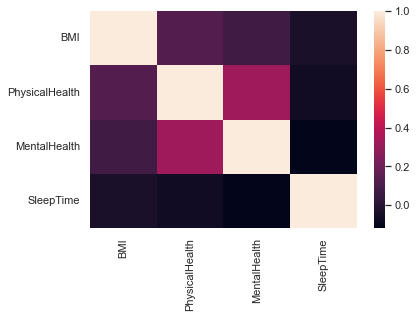

In [22]:
fig, ax = plt.subplots()
ax = sns.heatmap(df.corr())

<AxesSubplot:xlabel='Race'>

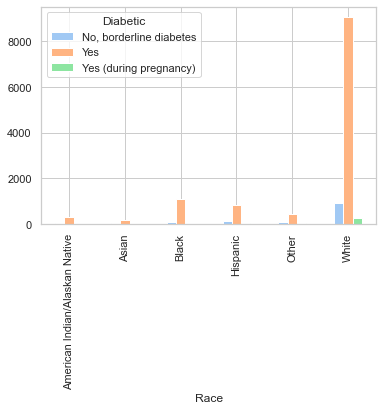

In [23]:
heartdiabetic = pd.crosstab(df['Race'], df['Diabetic'])
heartdiabetic = pd.DataFrame(heartdiabetic)
#heartdiabetic[['No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']].boxplot()
heartdiabetic[['No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']].plot(kind='bar')

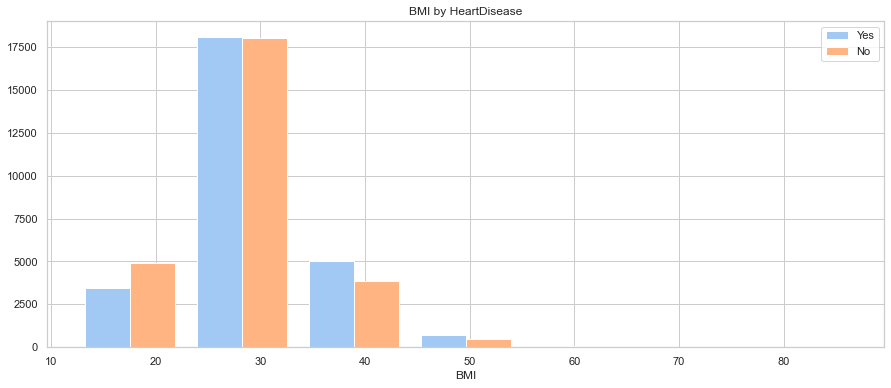

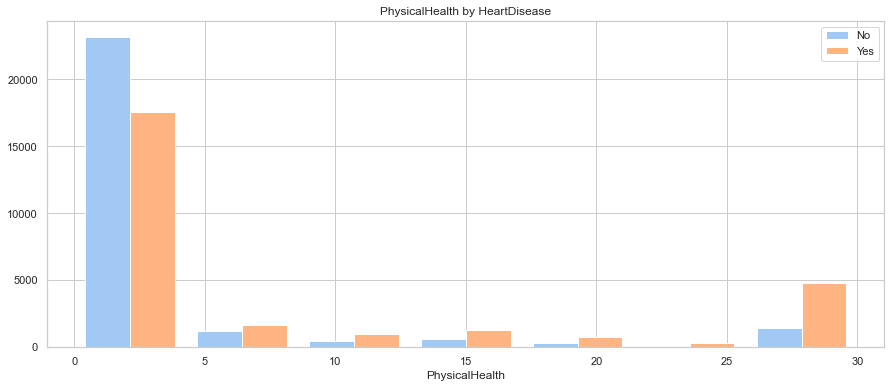

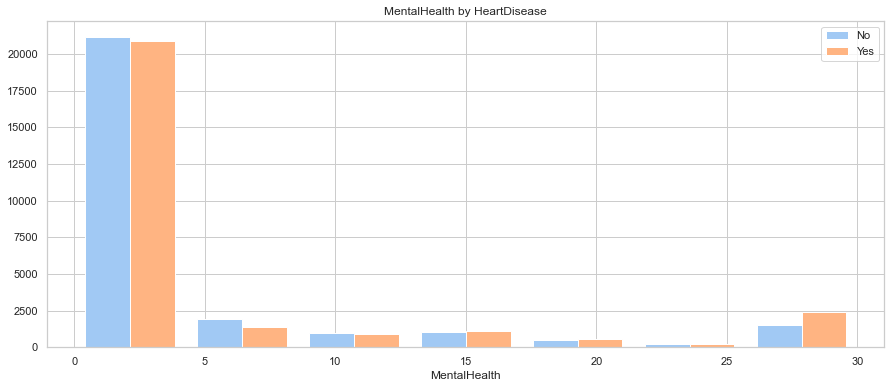

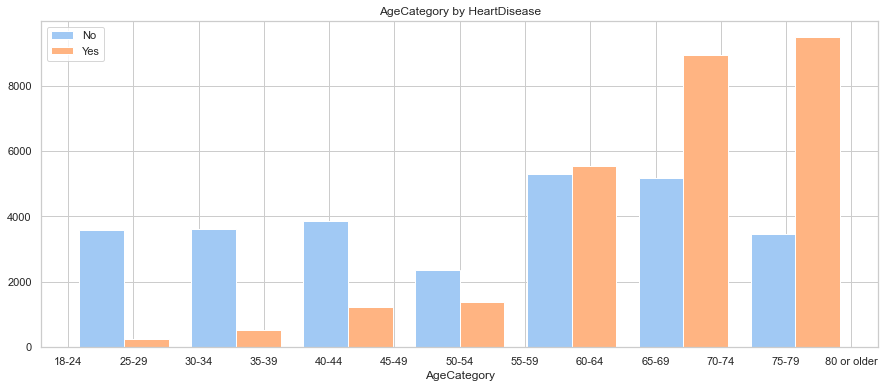

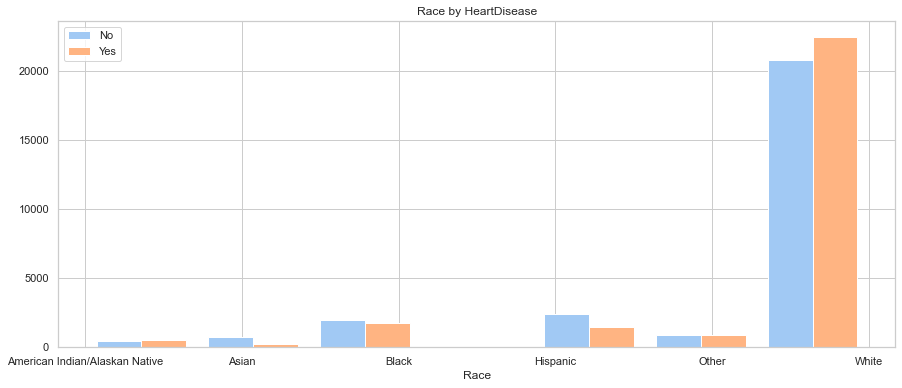

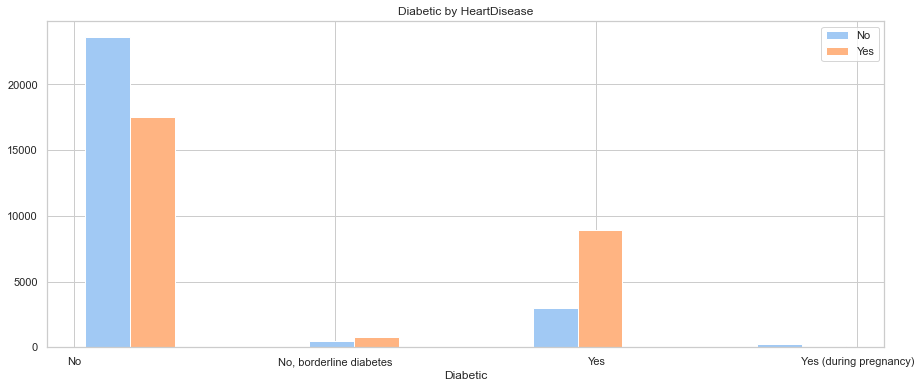

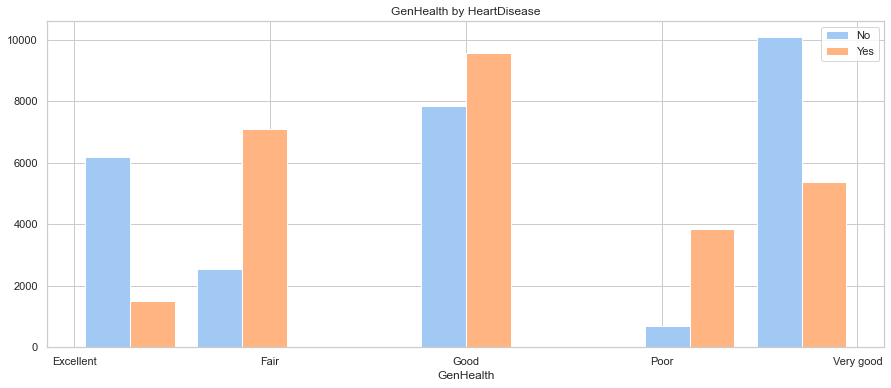

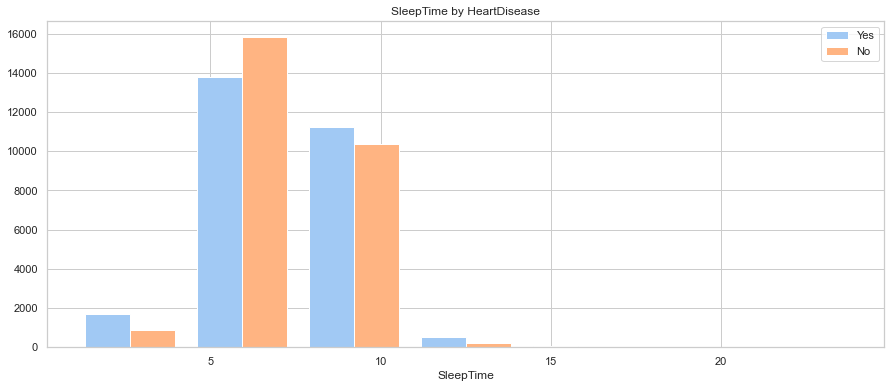

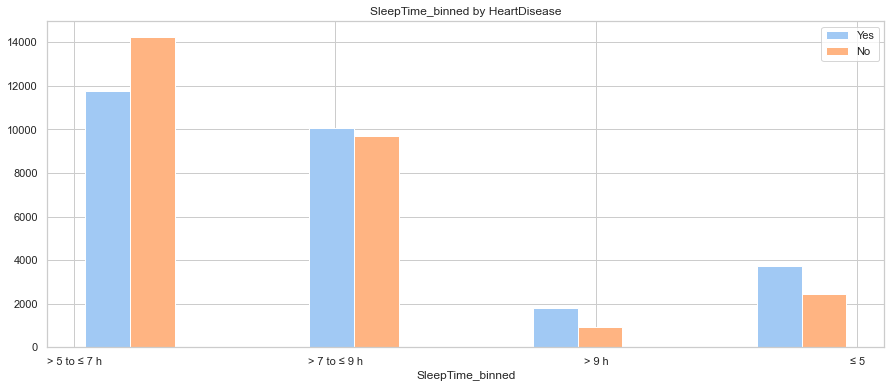

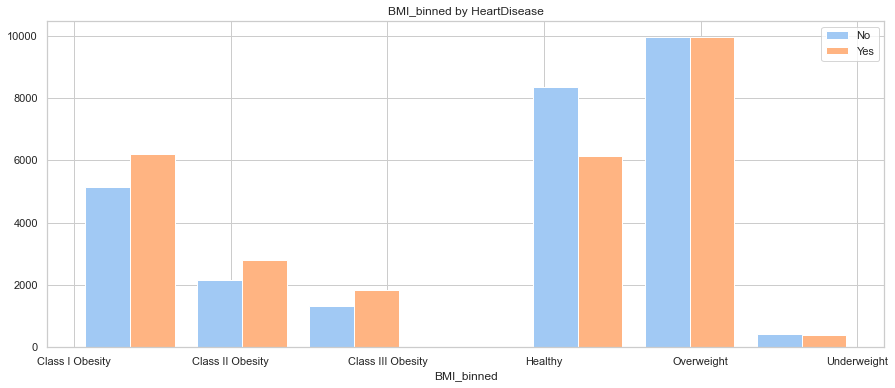

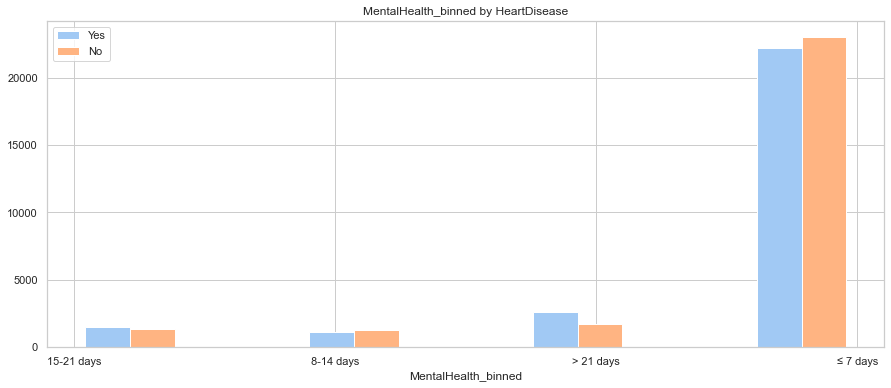

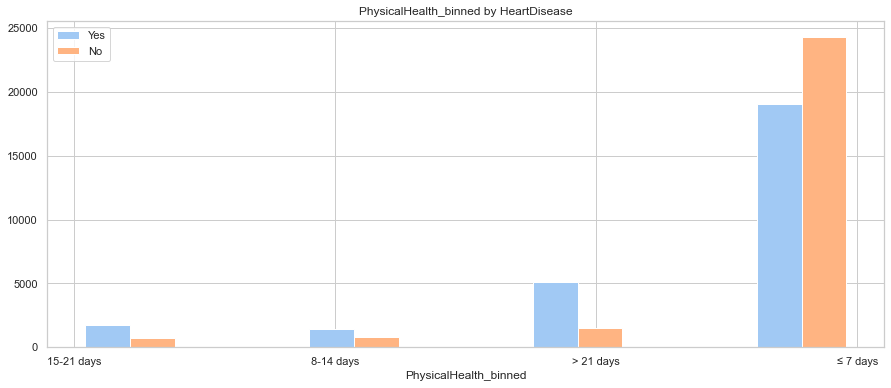

In [24]:
# distribution of features by HeartDisease
for col in df.columns:
    if df[col].nunique() > 2:
        data = df.sort_values(col)
        split_hist(data, col, split_by='HeartDisease', bins=7, figsize=(15,6))

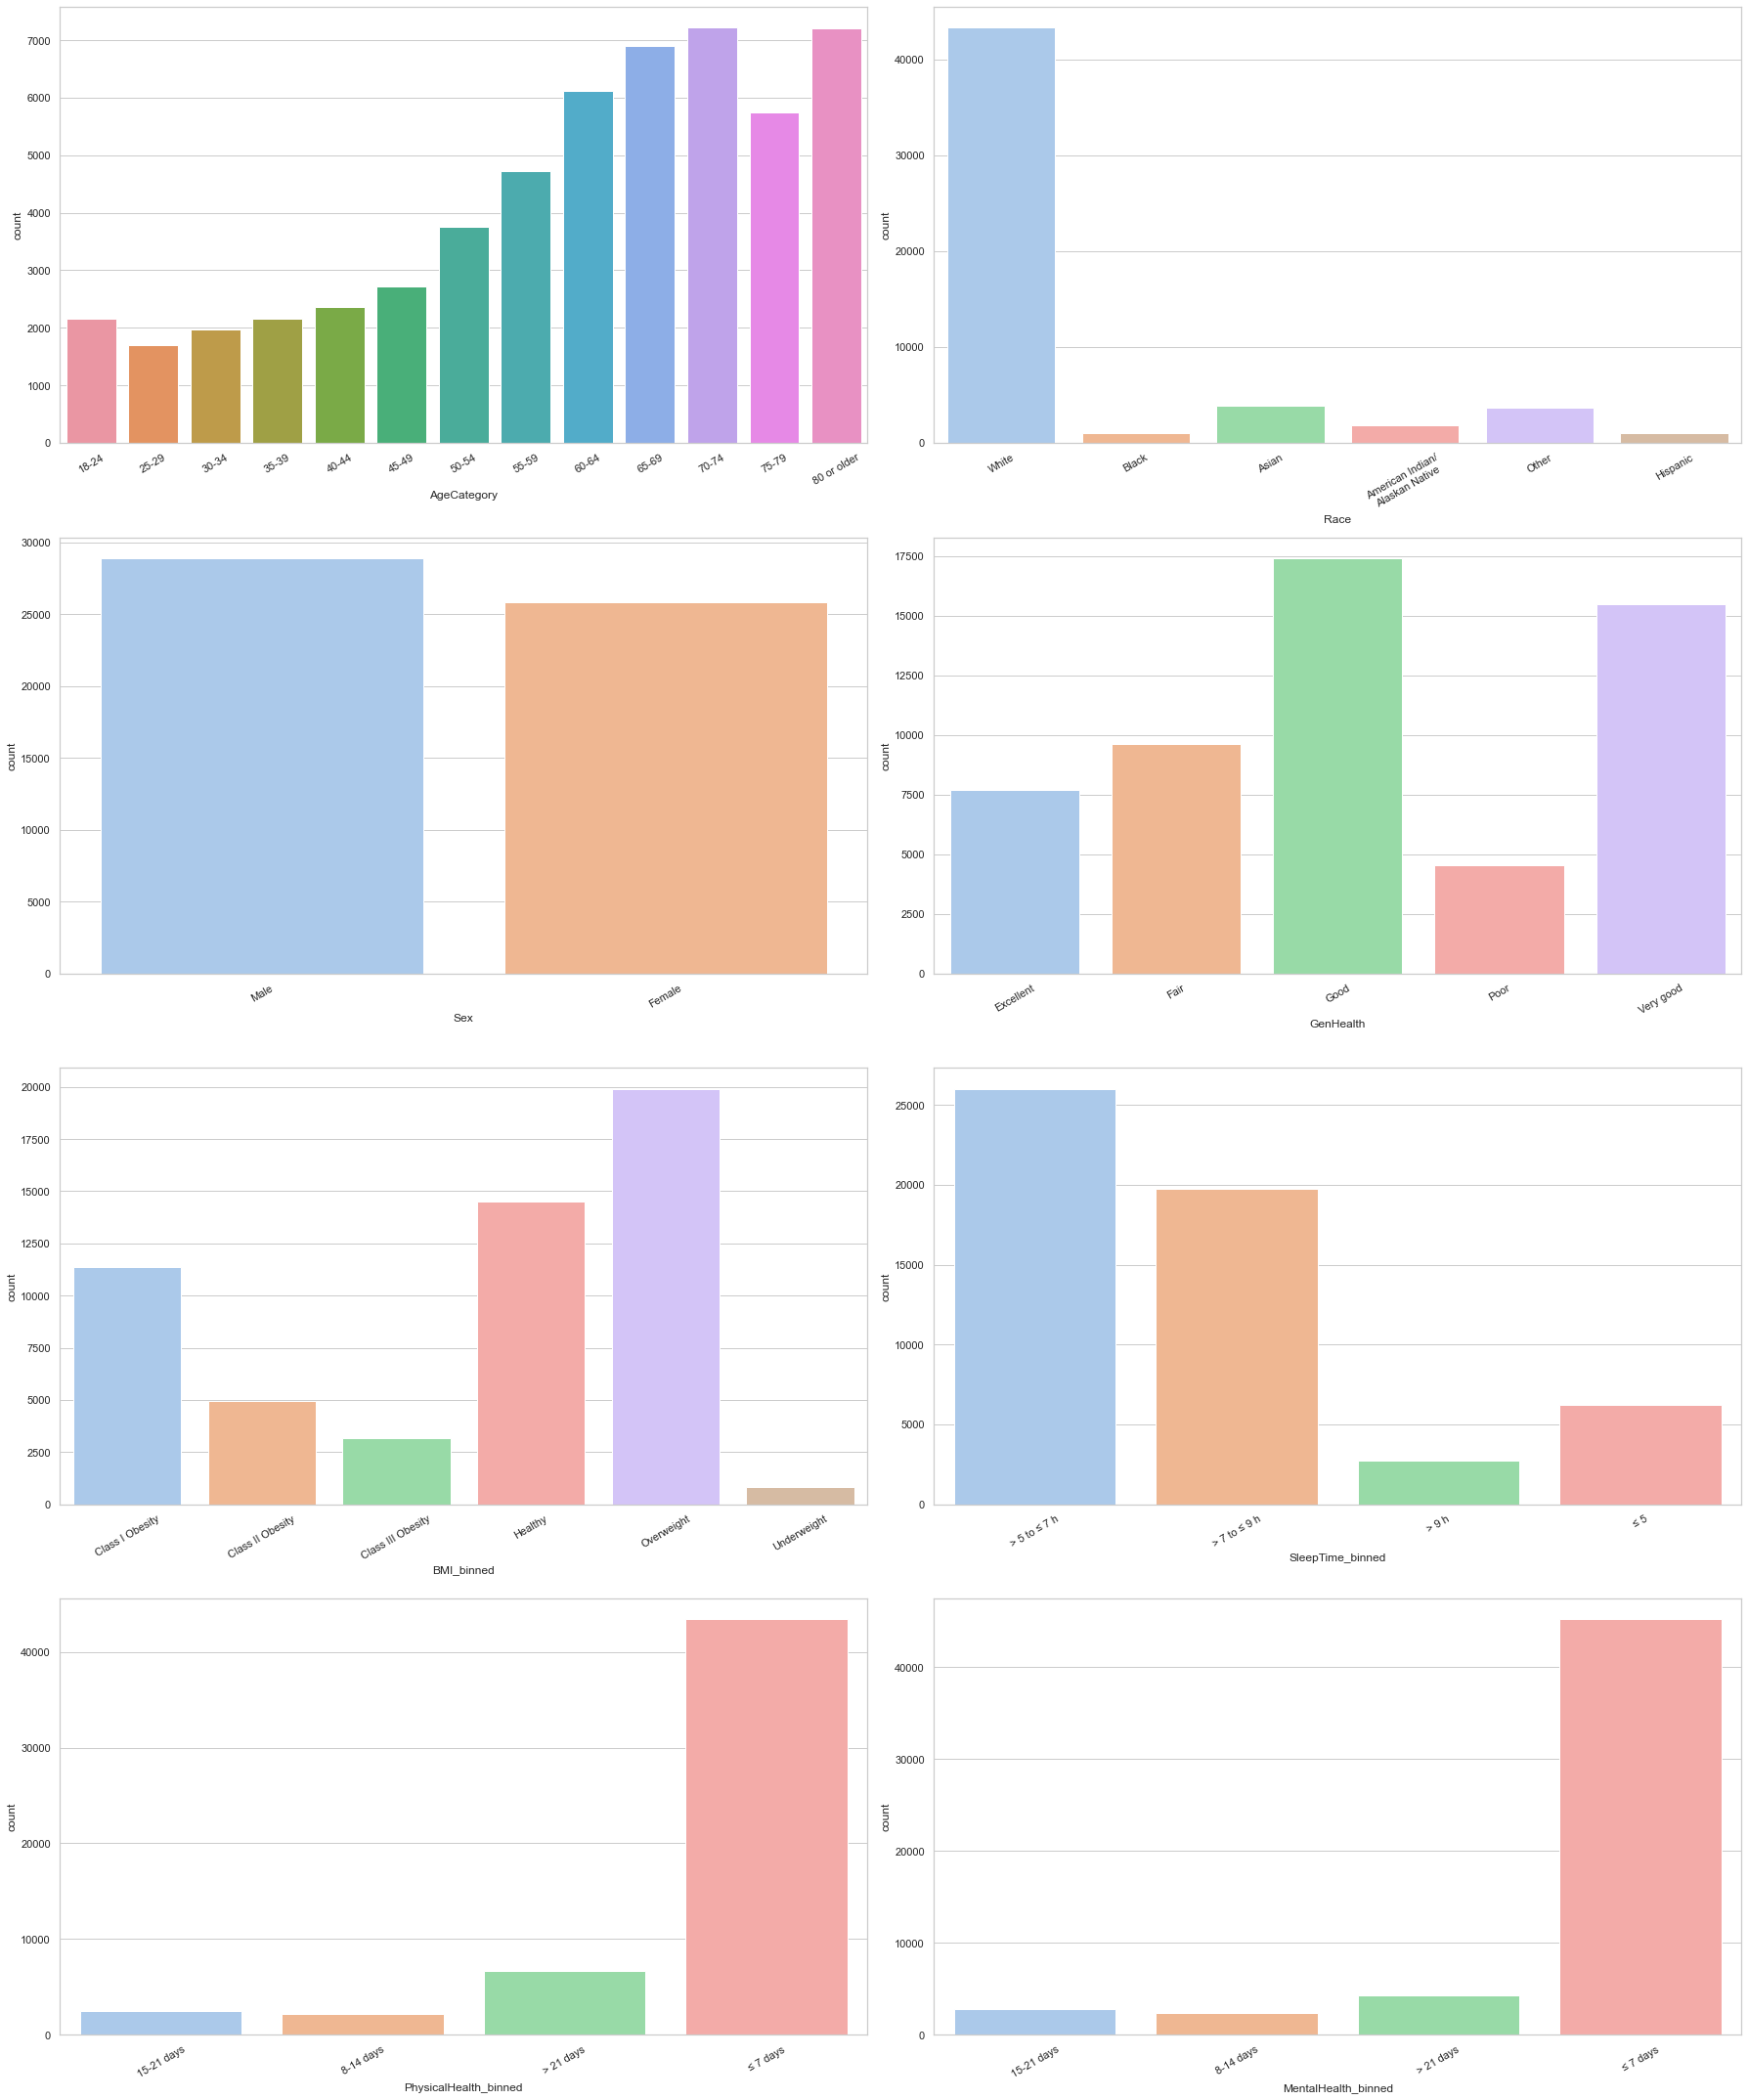

In [25]:
# binned countplots
fig, ax = plt.subplots(4, 2, figsize=(25,30))
age_dist = sns.countplot(x = df.sort_values('AgeCategory')['AgeCategory'], ax=ax[0][0])
age_dist.set_xticklabels(labels=df.sort_values('AgeCategory')['AgeCategory'].unique(), rotation=30)
race_dist = sns.countplot(x = df['Race'], ax=ax[0][1])
race_dist.set_xticklabels(labels=['White', 'Black', 'Asian', 'American Indian/\nAlaskan Native','Other', 'Hispanic'], rotation=30) 
sex_dist = sns.countplot(x = df['Sex'], ax=ax[1][0])
sex_dist.set_xticklabels(labels=df['Sex'].unique(), rotation=30) 
genhealth_dist = sns.countplot(x = df.sort_values('GenHealth')['GenHealth'], ax=ax[1][1])
genhealth_dist.set_xticklabels(labels=df.sort_values('GenHealth')['GenHealth'].unique(), rotation=30)
bmibin_dist = sns.countplot(x = df.sort_values('BMI_binned')['BMI_binned'], ax=ax[2][0])
bmibin_dist.set_xticklabels(labels=df.sort_values('BMI_binned')['BMI_binned'].unique(), rotation=30)
sleepbin_dist = sns.countplot(x = df.sort_values('SleepTime_binned')['SleepTime_binned'], ax=ax[2][1])
sleepbin_dist.set_xticklabels(labels=df.sort_values('SleepTime_binned')['SleepTime_binned'].unique(), rotation=30)
physicalbin_dist = sns.countplot(x = df.sort_values('PhysicalHealth_binned')['PhysicalHealth_binned'], ax=ax[3][0])
physicalbin_dist.set_xticklabels(labels=df.sort_values('PhysicalHealth_binned')['PhysicalHealth_binned'].unique(), rotation=30)
mentalbin_dist = sns.countplot(x = df.sort_values('MentalHealth_binned')['MentalHealth_binned'], ax=ax[3][1])
mentalbin_dist.set_xticklabels(labels=df.sort_values('MentalHealth_binned')['MentalHealth_binned'].unique(), rotation=30)
fig.tight_layout()
plt.show()

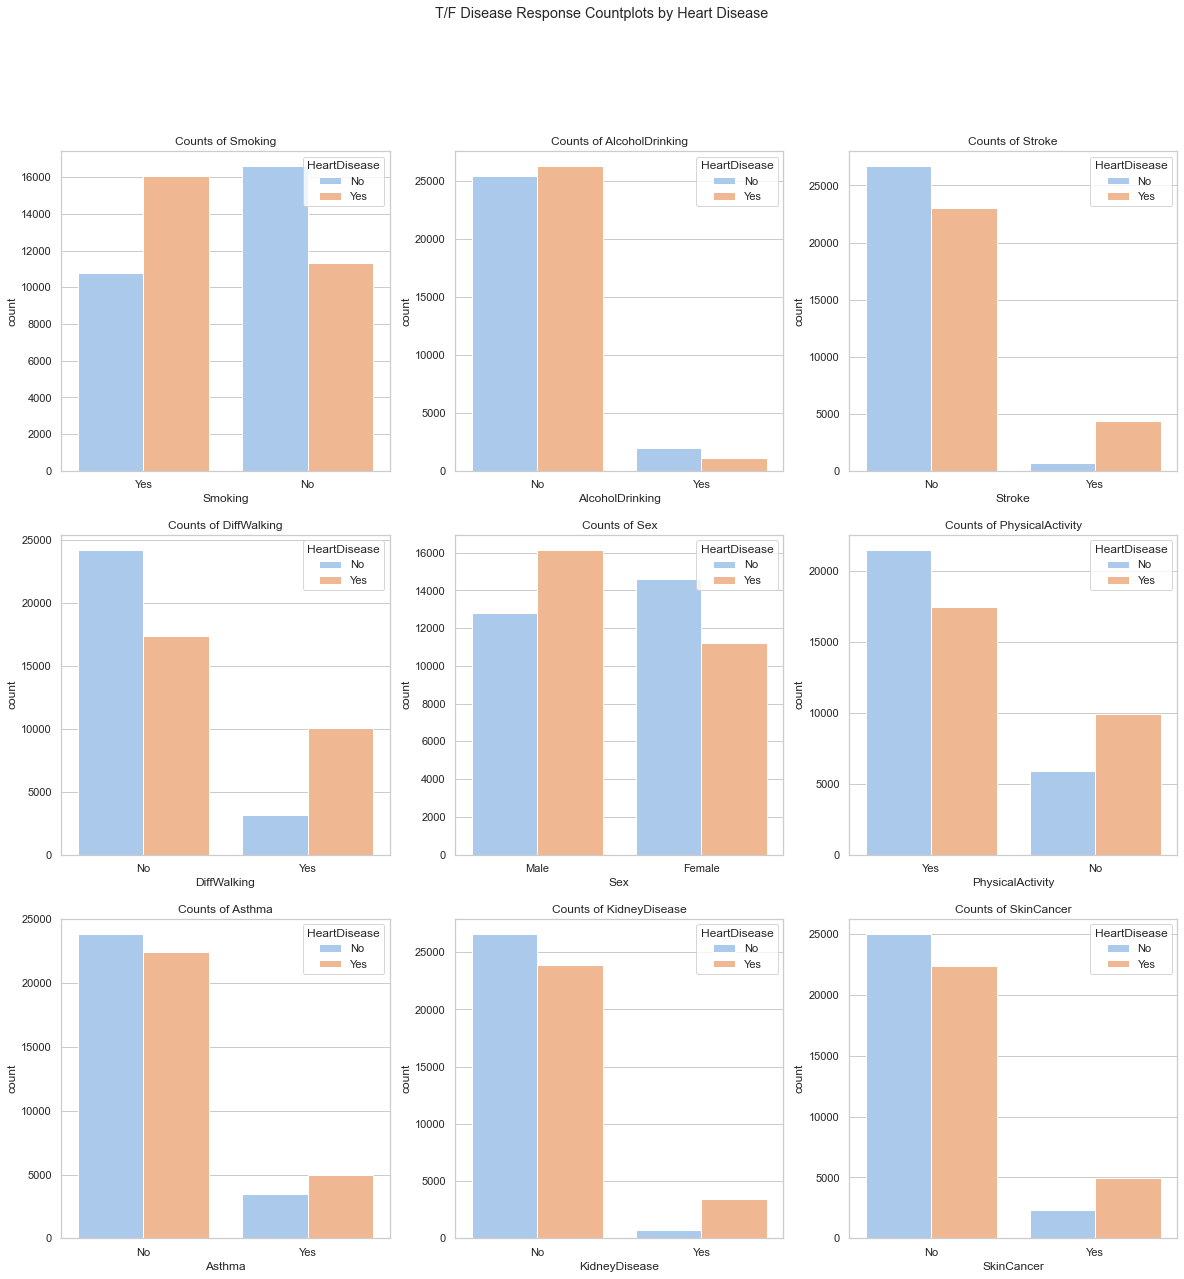

In [26]:
# boolean countplots by HeartDisease
bool_cols = [['Smoking','AlcoholDrinking','Stroke'],['DiffWalking','Sex','PhysicalActivity'],['Asthma','KidneyDisease','SkinCancer']]

def countplots(cols):
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    fig.suptitle("T/F Disease Response Countplots by Heart Disease")
    for row in range(3):
        for col in range(3):
            column = bool_cols[row][col]
            sns.countplot(x=df[column],ax=axes[row,col],hue=df['HeartDisease']).set(title="Counts of {}".format(column))

countplots(bool_cols)

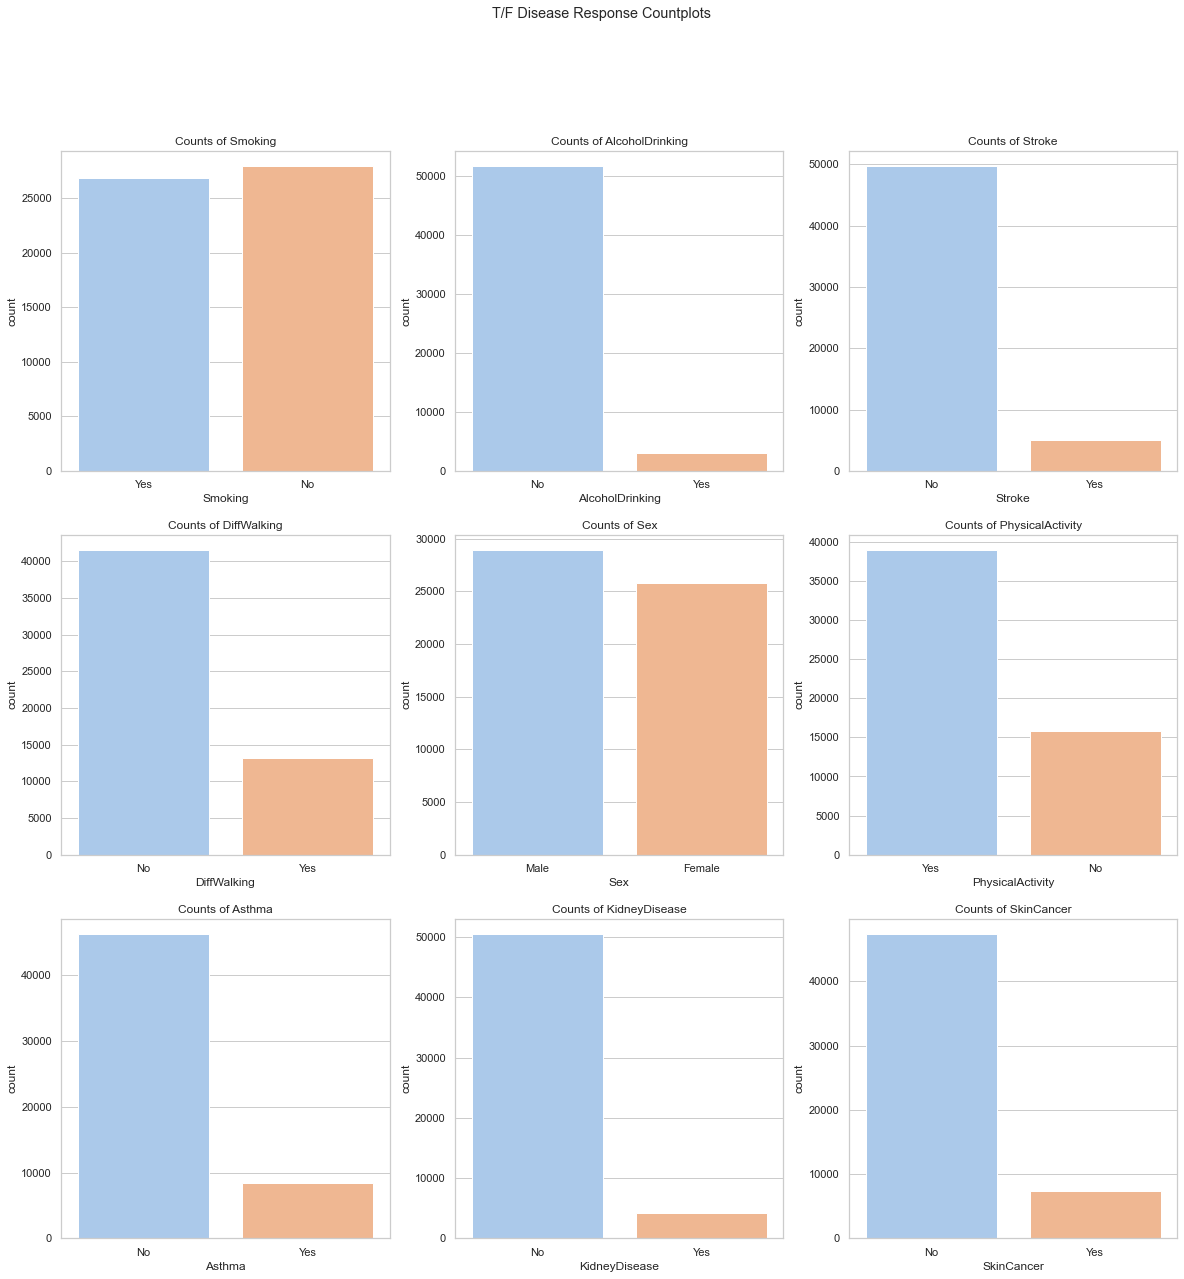

In [27]:
# boolean countplots 
def counts(cols):
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    fig.suptitle("T/F Disease Response Countplots")
    for row in range(3):
        for col in range(3):
            column = bool_cols[row][col]
            sns.countplot(x=df[column],ax=axes[row,col]).set(title="Counts of {}".format(column))

counts(bool_cols)

## Preprocessing

Encode and standardize the data.

In [28]:
# one hot encode variables in which hierarchy invites discrimination, or have over 2 unique values
lencoder = LabelEncoder()
columns = ['Sex', 'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

for col in columns:
        df[col] = lencoder.fit_transform(df[col])
        
df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth', 'AgeCategory'], prefix=['Race', 'Diabetic', 'GenHealth', 'AgeCategory'])
binned_df = df.copy()
binned_df = pd.get_dummies(binned_df, columns=['SleepTime_binned', 'BMI_binned', 'MentalHealth_binned', 'PhysicalHealth_binned'], prefix=['SleepTime_binned', 'BMI_binned', 'MentalHealth_binned', 'PhysicalHealth_binned'])


In [29]:
# separate collinear features
binned_df = binned_df.drop(columns=['SleepTime', 'BMI', 'MentalHealth', 'PhysicalHealth'])

df = df.drop(columns=['SleepTime_binned', 'BMI_binned', 'MentalHealth_binned', 'PhysicalHealth_binned'])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
0,0,34.87,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0,28.89,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,0,25.68,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0,28.08,0,0,0,1,10,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,28.67,0,0,0,30,30,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# train_test_split (before scaler)
X = df.iloc[:, 1:]
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
# separate numerical columns to be scaled
num_train_df = X_train[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]
num_test_df = X_test[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

In [34]:
# fit scaler on training data and only transform test data
# scale after train_test_split to avoid causing data leakage
scaler = StandardScaler()

X_train_num = scaler.fit(num_train_df)
X_train_num = scaler.transform(num_train_df)

X_test_num = scaler.transform(num_test_df)

In [35]:
# Add column names and convert cont
col_names = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

X_train_num = pd.DataFrame(X_train_num, columns=col_names)
X_test_num = pd.DataFrame(X_test_num, columns=col_names)

In [36]:
# merge cat and num dataframes
X_train = X_train.drop(columns=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'])
X_train = X_train.reset_index(drop=True)
X_train = X_train.merge(X_train_num, left_index=True, right_index=True)

X_test = X_test.drop(columns=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'])
X_test = X_test.reset_index(drop=True)
X_test = X_test.merge(X_test_num, left_index=True, right_index=True)